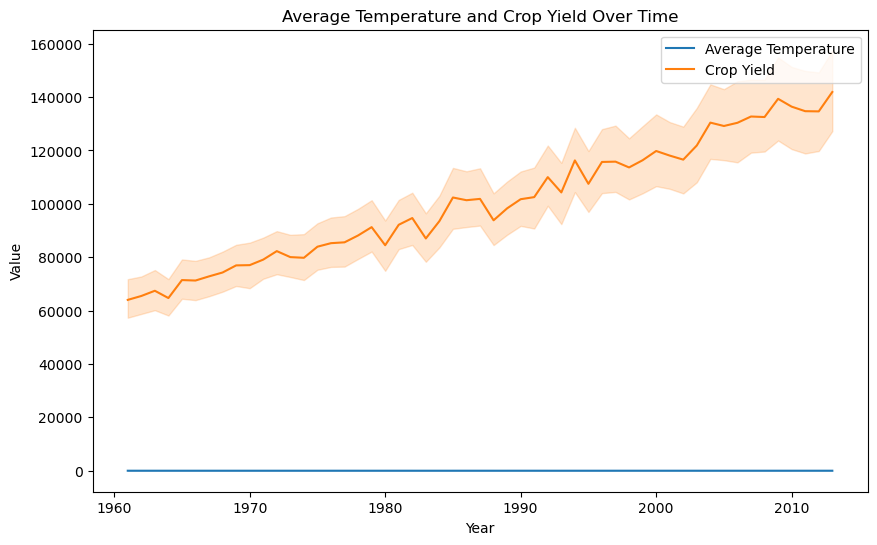

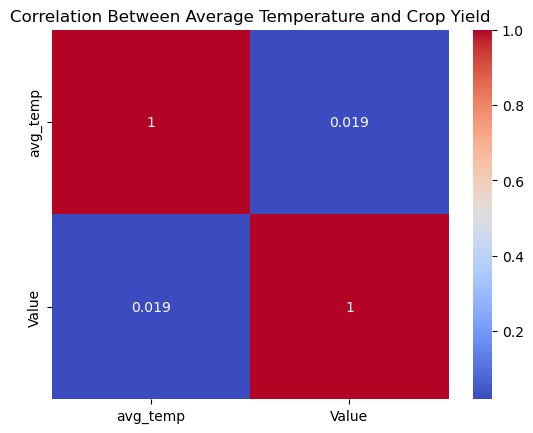

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the TEMPUS dataset
tempus_data = pd.read_csv('TEMPUS.csv')

# Load the YIELDUS dataset
yieldus_data = pd.read_csv('YIELDUS.csv')

# Merge the two datasets based on the 'Year' column
merged_data = pd.merge(tempus_data, yieldus_data, left_on='year', right_on='Year', how='inner')

# Illustration 1: Line Graph with Overlaid Temperature and Yield Changes
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='avg_temp', data=merged_data, label='Average Temperature')
sns.lineplot(x='Year', y='Value', data=merged_data, label='Crop Yield')
plt.title('Average Temperature and Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Illustration 2: Heat Map of Correlation
correlation_matrix = merged_data[['avg_temp', 'Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Average Temperature and Crop Yield')
plt.show()



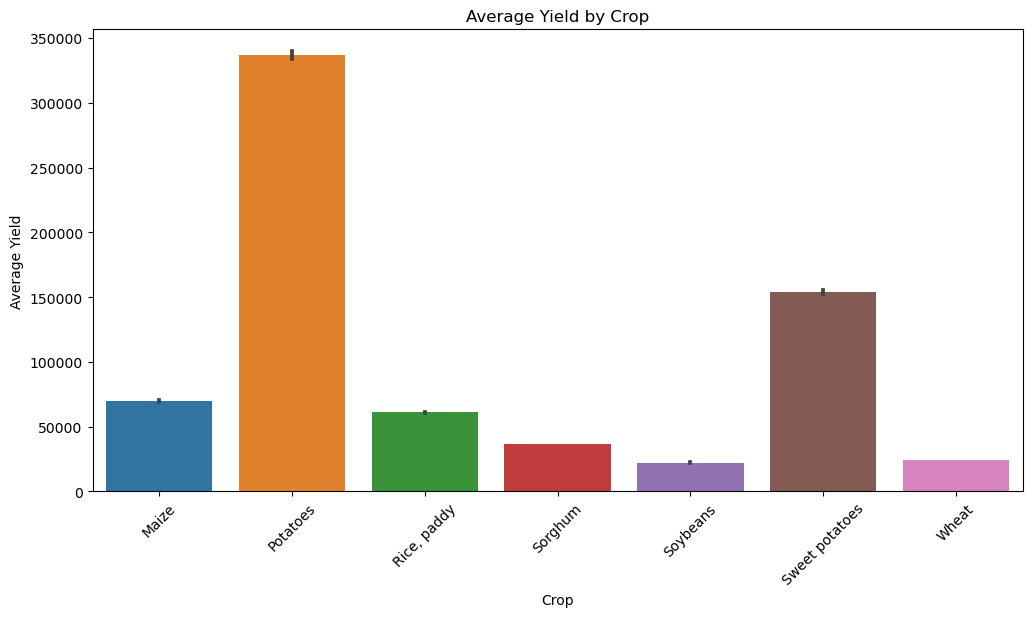

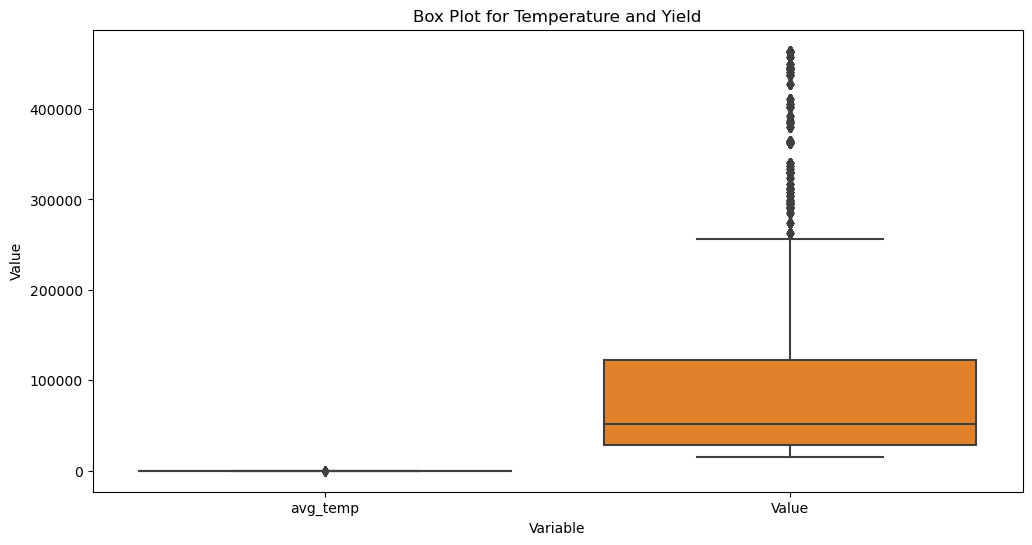

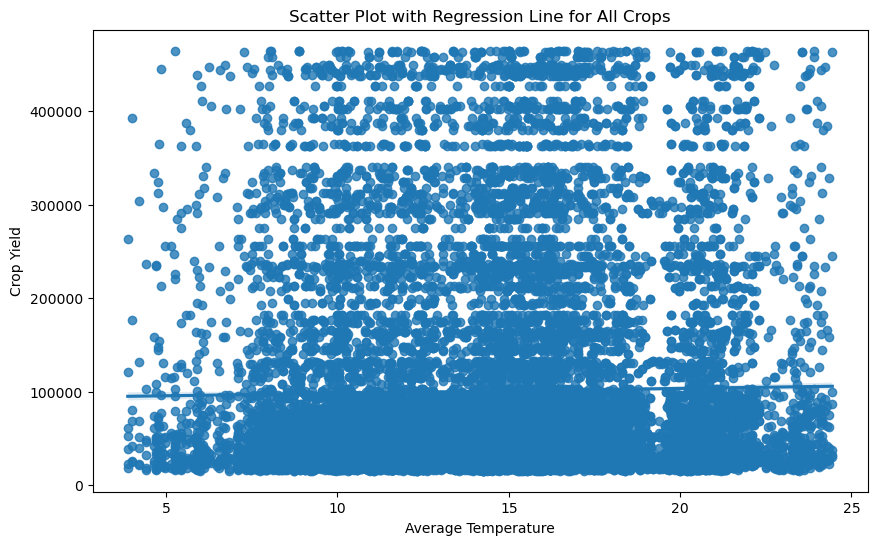

In [22]:
# ... (previous code remains unchanged)

# 1. Bar Plot of Average Yield by Crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Item', y='Value', data=merged_data)
plt.title('Average Yield by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Yield')
plt.xticks(rotation=45)
plt.show()

# 2. Box Plot for Temperature and Yield
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[['avg_temp', 'Value']])
plt.title('Box Plot for Temperature and Yield')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

# 3. Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_temp', y='Value', data=merged_data)
plt.title('Scatter Plot with Regression Line for All Crops')
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield')
plt.show()






In [14]:
print("Predicted temperatures for 2020 and 2030:", predicted_temps)
print("Predicted yields for 2020 and 2030:", predicted_yield)

Predicted temperatures for 2020 and 2030: [15.64299017 15.89305514]
Predicted yields for 2020 and 2030: [101033.70829486 101164.44077659]


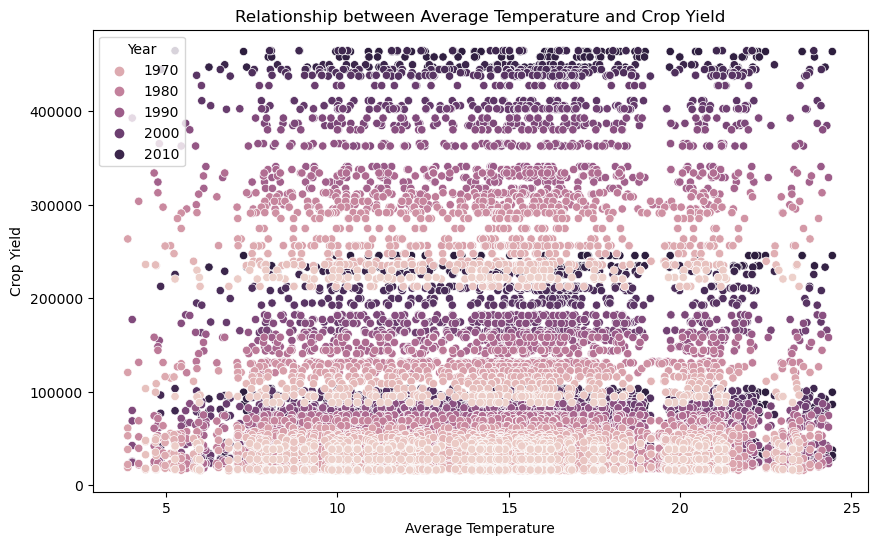

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the TEMPUS dataset
tempus_data = pd.read_csv('TEMPUS.csv')

# Load the YIELDUS dataset
yieldus_data = pd.read_csv('YIELDUS.csv')

# Plotting the forecasts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the forecast for Yield
ax1.set_xlabel('Year')
ax1.set_ylabel('Yield Forecast', color='tab:blue')
ax1.plot(forecast_df['Year'], forecast_df['Yield_Forecast'], color='tab:blue', label='Yield Forecast')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot the forecast for Average Temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature Forecast', color='tab:red')
ax2.plot(forecast_df['Year'], forecast_df['Temp_Forecast'], color='tab:red', label='Temperature Forecast')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding title and legend
plt.title('Forecast of Wheat Yield and Average Temperature for the Next 20 Years')
fig.tight_layout()

plt.show()


In [6]:
merged_data

,year,country,avg_temp,Domain,Area,Element,Item Code,Item,Year Code,Year,Value
0,2013,United States,13.63,Crops,United States of America,Yield,56,Maize,2013,2013,99256
1,2013,United States,13.63,Crops,United States of America,Yield,116,Potatoes,2013,2013,463577
2,2013,United States,13.63,Crops,United States of America,Yield,27,"Rice, paddy",2013,2013,86232
3,2013,United States,13.63,Crops,United States of America,Yield,83,Sorghum,2013,2013,37396
4,2013,United States,13.63,Crops,United States of America,Yield,236,Soybeans,2013,2013,29615
...,...,...,...,...,...,...,...,...,...,...,...
19287,1961,United States,12.64,Crops,United States of America,Yield,27,"Rice, paddy",1961,1961,38227
19288,1961,United States,12.64,Crops,United States of America,Yield,83,Sorghum,1961,1961,27442
19289,1961,United States,12.64,Crops,United States of America,Yield,236,Soybeans,1961,1961,16900
19290,1961,United States,12.64,Crops,United States of America,Yield,122,Sweet potatoes,1961,1961,88222


### Random Forest Look

Mean Squared Error: 1.1561746210013972


C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: U

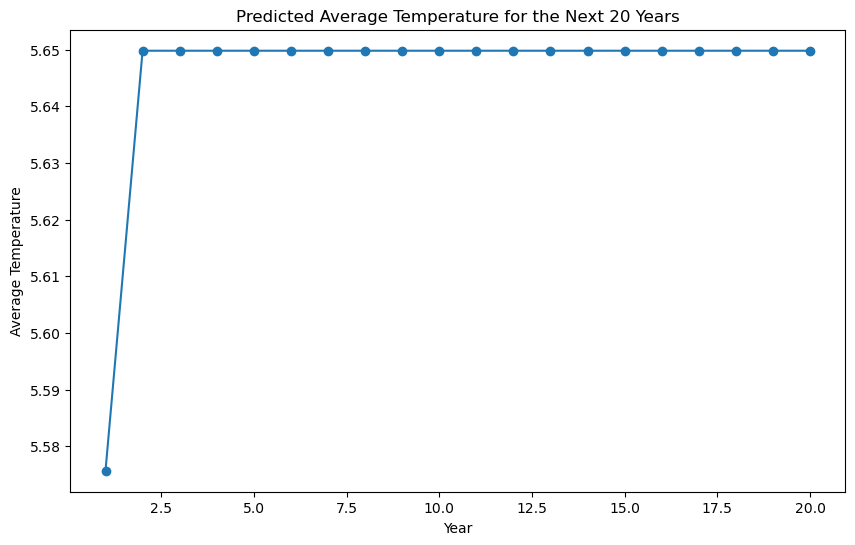

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the TEMPUS dataset
tempus_data = pd.read_csv('TEMPUS.csv')

# Ensure that the 'year' column is of numeric type
tempus_data['year'] = pd.to_numeric(tempus_data['year'], errors='coerce')

# Create lagged features to use previous years' temperatures to predict the next year's temperature
for i in range(1, 6):  # Creating 5 lagged features as an example
    tempus_data[f'lag_{i}'] = tempus_data['avg_temp'].shift(i)

# Drop rows with NaN values created by lagging
tempus_data = tempus_data.dropna()

# Prepare the features (X) and the target (y)
# Ensure that only numeric columns are included in X
X = tempus_data.drop(columns=['avg_temp']).select_dtypes(include=['number'])
y = tempus_data['avg_temp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict the temperature for the next 20 years
# Here, you would need to recursively use the model's predictions as new features
future_temps = []
for i in range(20):
    new_features = list(X.iloc[-1, 1:]) + [y.iloc[-1] if not future_temps else future_temps[-1]]
    future_temp = rf_model.predict([new_features])[0]
    future_temps.append(future_temp)

# Plot the predicted temperatures for the next 20 years
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), future_temps, marker='o')
plt.title('Predicted Average Temperature for the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()


